In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '8'
import yaml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bp_mapping = {
    1: ("NAD-U1", "INDURO"),
    2: ("Ap₄A-U1", "INDURO"),
    3: ("m⁷Gp₃A-U1", "INDURO"),
    4: ("TMG-U1", "INDURO"),
    5: ("NAD-U1", "ProtoScript"),
    6: ("Ap₄A-U1", "ProtoScript"),
    7: ("m⁷Gp₃A-U1", "ProtoScript"),
    8: ("TMG-U1", "ProtoScript"),
    9: ("NAD-U1", "Marathon"),
    10: ("Ap₄A-U1", "Marathon"),
    11: ("m⁷Gp₃A-U1", "Marathon"),
    12: ("TMG-U1", "Marathon"),
    13: ("NAD-U1", "GoScript"),
    14: ("Ap₄A-U1", "GoScript"),
    15: ("m⁷Gp₃A-U1", "GoScript"),
    16: ("TMG-U1", "GoScript"),
    17: ("NAD-U1", "EpiScript"),
    18: ("Ap₄A-U1", "EpiScript"),
    19: ("m⁷Gp₃A-U1", "EpiScript"),
    20: ("TMG-U1", "EpiScript"),
}

## Load fingerprints data

FM180 + FM181 and FM179_combined

In [3]:
# FM180, choose only 1-12 barcodes
df180_1 = pd.read_csv(
    '../data/FM180_BP01-12/no_sample_id/20250224_1757_MN43023_FAZ12635_68f383d0/fastq_pass/fingerprints.csv'
)
df180_1['barcode_num'] = df180_1['barcode'].apply(lambda x: int(x.split('barcode')[1]))
df180_1 = df180_1[(df180_1['barcode_num'] >= 1) & (df180_1['barcode_num'] <= 12)]

# FM181, choose only 13-20 barcodes
df180_2 = pd.read_csv(
    '../data/FM181_BP13-20/no_sample_id/20250226_2018_MN43023_FAZ13458_a45f3d18/fastq_pass/fingerprints.csv'
)
df180_2['barcode_num'] = df180_2['barcode'].apply(lambda x: int(x.split('barcode')[1]))
df180_2 = df180_2[(df180_2['barcode_num'] >= 13) & (df180_2['barcode_num'] <= 20)]

# Concatenate FM180 and FM181
df180 = pd.concat([df180_1, df180_2])
df180['experiment'] = 'FM180 + FM181'

# FM179_combined
df179 = pd.read_csv(
    '../data/FM179_combined_FM165_ISOFORMS/fastq_pass/fingerprints.csv'
)
df179['barcode_num'] = df179['barcode'].apply(lambda x: int(x.split('barcode')[1]))
df179['experiment'] = 'FM179_combined'

# Concatenate all dataframes
df = pd.concat([df180, df179])

display(df)
# Choose only E_(5_6_7_8) isoform
df = df[df['isoform'] == 'E_(5_6_7_8)']
df[['cap', 'RT']] = df.apply(lambda x: pd.Series(bp_mapping[x['barcode_num']]), axis=1)

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,num_reads_ACGT,...,G%_INSDEL,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,barcode_num,experiment
0,barcode01,G_(10),5,5,0,0,0,0,0,5,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1,FM180 + FM181
1,barcode11,G_(10),0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,FM180 + FM181
2,barcode02,C_(3),4,3,0,0,1,0,0,4,...,0.000000,0.250000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,2,FM180 + FM181
3,barcode08,E_(5_6_7_8),2987,1923,209,177,219,278,181,2528,...,0.059257,0.073318,0.060596,0.093070,0.760680,0.082674,0.070016,0.086630,8,FM180 + FM181
4,barcode01,C_(3),17,9,0,1,2,2,3,12,...,0.058824,0.117647,0.176471,0.117647,0.750000,0.000000,0.083333,0.166667,1,FM180 + FM181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,barcode11,F_(9),4221,2009,400,766,488,83,475,3663,...,0.181474,0.115612,0.112533,0.019664,0.548458,0.109200,0.209118,0.133224,11,FM179_combined
148,barcode02,D_(4),5,1,2,0,1,0,1,4,...,0.000000,0.200000,0.200000,0.000000,0.250000,0.500000,0.000000,0.250000,2,FM179_combined
149,barcode02,F_(9),2405,834,155,234,434,321,427,1657,...,0.097297,0.180457,0.177547,0.133472,0.503319,0.093543,0.141219,0.261919,2,FM179_combined
150,barcode20,D_(4),0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20,FM179_combined


In [7]:
df.sort_values(by='barcode').to_csv('../data/FM179-FM181_fingerprints.csv', index=False)

In [12]:
df.columns

Index(['barcode', 'isoform', 'num_reads', 'num_A', 'num_C', 'num_G', 'num_T',
       'num_DEL', 'num_INS', 'num_reads_ACGT', 'A%_INSDEL', 'C%_INSDEL',
       'G%_INSDEL', 'T%_INSDEL', 'INS%_INSDEL', 'DEL%_INSDEL', 'A%', 'C%',
       'G%', 'T%', 'barcode_num', 'experiment', 'cap', 'RT'],
      dtype='object')

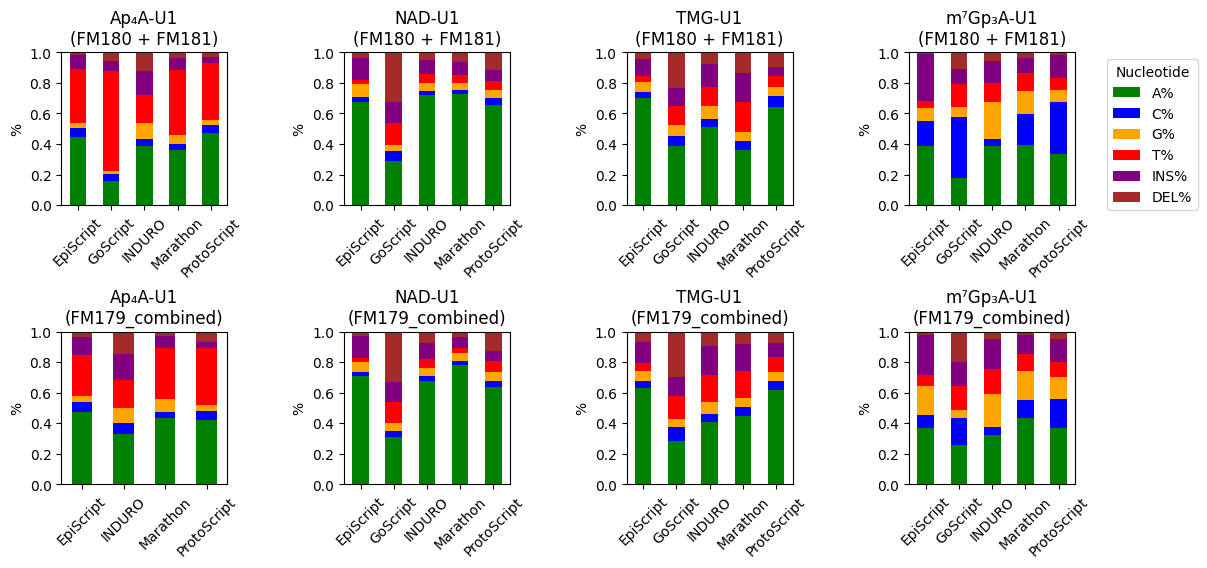

In [15]:
# nucleotide_cols = ['A%', 'C%', 'G%', 'T%']
nucleotide_cols = ['A%_INSDEL', 'C%_INSDEL', 'G%_INSDEL', 'T%_INSDEL', 'INS%_INSDEL', 'DEL%_INSDEL']
colors = {'A%_INSDEL': 'green', 'C%_INSDEL': 'blue', 'G%_INSDEL': 'orange', 'T%_INSDEL': 'red', 'INS%_INSDEL': 'purple', 'DEL%_INSDEL': 'brown'}

# Get number of experiments and caps for subplot grid
experiments = df['experiment'].unique()
n_rows = len(experiments)
n_cols = len(df['cap'].unique())

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
fig.tight_layout(pad=5.0, h_pad=7.0)  # Increased padding between rows with h_pad

for i, experiment in enumerate(experiments):
    df_experiment = df[df['experiment'] == experiment]
    
    for j, cap in enumerate(sorted(df_experiment['cap'].unique())):
        subset = df_experiment[df_experiment['cap'] == cap].copy()
        subset = subset[['RT'] + nucleotide_cols].set_index('RT')
        subset = subset.reindex(sorted(subset.index))
        
        # Plot on appropriate subplot
        if i == 0 and j == n_cols-1:  # Top right plot
            ax = subset.plot(kind='bar', stacked=True, ax=axes[i,j],
                           color=colors, legend=True)
            # Move legend outside with more space
            legend = axes[i,j].legend(title='Nucleotide', bbox_to_anchor=(1.15, 1))
            # Remove _INSDEL suffix from legend labels
            for text in legend.get_texts():
                text.set_text(text.get_text().replace('_INSDEL', ''))
        else:
            subset.plot(kind='bar', stacked=True, ax=axes[i,j],
                       color=colors, legend=False)
        
        axes[i,j].set_title(f"{cap}\n({experiment})")
        axes[i,j].set_ylabel('%')
        axes[i,j].set_ylim(0, 1.0)
        
        # Rotate x-axis labels
        axes[i,j].tick_params(axis='x', rotation=45)
        axes[i,j].set_xlabel('')

plt.show()

In [ ]:
df_train = pd.read_csv('../data/FM179-FM181_fingerprints.csv')
df_train.head()

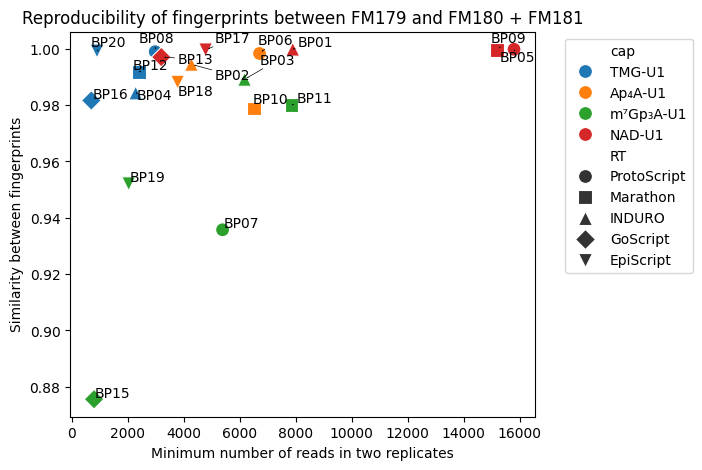

In [24]:
# Group by barcode and calculate min reads and cosine similarity
similarities = []
min_reads = []
labels = []
caps = []
rts = []

for barcode in df['barcode'].unique():
    barcode_data = df[df['barcode'] == barcode]
    if len(barcode_data) == 2:  # Only process barcodes that appear twice
        # Get ACGT vectors for both copies
        vec1 = barcode_data.iloc[0][['A%', 'C%', 'G%', 'T%']].values
        vec2 = barcode_data.iloc[1][['A%', 'C%', 'G%', 'T%']].values
        
        # Calculate cosine similarity
        similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        
        # Get minimum number of reads
        min_read = min(barcode_data['num_reads'])
        
        # Create label with cap, RT and barcode number
        barcode_num = barcode.replace('barcode', '')
        label = f"BP{barcode_num}"
        
        # Store cap and RT info
        cap = barcode_data.iloc[0]['cap']
        rt = barcode_data.iloc[0]['RT']
        
        similarities.append(similarity)
        min_reads.append(min_read)
        labels.append(label)
        caps.append(cap)
        rts.append(rt)

# Create DataFrame for seaborn
plot_df = pd.DataFrame({
    'min_reads': min_reads,
    'similarity': similarities,
    'label': labels,
    'cap': caps,
    'RT': rts
})

# Define markers for each RT
markers = {
    'ProtoScript': 'o',
    'Marathon': 's', 
    'INDURO': '^',
    'GoScript': 'D',
    'EpiScript': 'v'
}

# Create scatter plot with seaborn
plt.figure(figsize=(6, 5))
sns.scatterplot(data=plot_df, x='min_reads', y='similarity', 
                hue='cap', style='RT', markers=markers, s=100)

plt.xlabel('Minimum number of reads in two replicates')
plt.ylabel('Similarity between fingerprints')
plt.title('Reproducibility of fingerprints between FM179 and FM180 + FM181')

# Add labels with adjustText
texts = []
for _, row in plot_df.iterrows():
    texts.append(plt.text(row['min_reads'], row['similarity'], row['label']))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.show()

## Predict FM179 caps given FM180 + FM181 data

In [5]:
df_train = df[df['experiment'] == 'FM179_combined']
df_test = df[df['experiment'] == 'FM180 + FM181']

In [9]:
from rnacappredictor.predict_cap import predict_cap
predict_cap(df_train, df_test, show_true_cap=True, include_insdel=False)

Experiment: FM180 + FM181
True cap: Ap₄A-U1
20 RTs considered for prediction(['ProtoScript', 'ProtoScript', 'Marathon', 'INDURO', 'Marathon', 'Marathon', 'ProtoScript', 'INDURO', 'INDURO', 'ProtoScript', 'Marathon', 'INDURO', 'GoScript', 'EpiScript', 'EpiScript', 'EpiScript', 'GoScript', 'GoScript', 'EpiScript', 'GoScript']) with mean number of reads 18388.5
Top-1 prediction: Ap₄A-U1 (FM179_combined) with similarity 0.848
Top-2 prediction: TMG-U1 (FM179_combined) with similarity 0.831
Top-3 prediction: m⁷Gp₃A-U1 (FM179_combined) with similarity 0.794
Top-4 prediction: NAD-U1 (FM179_combined) with similarity 0.762


Experiment: FM180 + FM181
True cap: NAD-U1
20 RTs considered for prediction(['ProtoScript', 'ProtoScript', 'Marathon', 'INDURO', 'Marathon', 'Marathon', 'ProtoScript', 'INDURO', 'INDURO', 'ProtoScript', 'Marathon', 'INDURO', 'GoScript', 'EpiScript', 'EpiScript', 'EpiScript', 'GoScript', 'GoScript', 'EpiScript', 'GoScript']) with mean number of reads 18388.5
Top-1 prediction:

,experiment,true_cap,num_rts,used_rts,mean_reads,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,similarity_3,prediction_4,similarity_4
0,FM180 + FM181,Ap₄A-U1,20,"[ProtoScript, ProtoScript, Marathon, INDURO, M...",18388.5,Ap₄A-U1 (FM179_combined),0.847568,TMG-U1 (FM179_combined),0.830839,m⁷Gp₃A-U1 (FM179_combined),0.794361,NAD-U1 (FM179_combined),0.761620
1,FM180 + FM181,NAD-U1,20,"[ProtoScript, ProtoScript, Marathon, INDURO, M...",18388.5,NAD-U1 (FM179_combined),0.999112,TMG-U1 (FM179_combined),0.970460,m⁷Gp₃A-U1 (FM179_combined),0.888686,Ap₄A-U1 (FM179_combined),0.801659
2,FM180 + FM181,TMG-U1,20,"[ProtoScript, ProtoScript, Marathon, INDURO, M...",18388.5,TMG-U1 (FM179_combined),0.991345,NAD-U1 (FM179_combined),0.967504,m⁷Gp₃A-U1 (FM179_combined),0.910070,Ap₄A-U1 (FM179_combined),0.829183
3,FM180 + FM181,m⁷Gp₃A-U1,20,"[ProtoScript, ProtoScript, Marathon, INDURO, M...",18388.5,m⁷Gp₃A-U1 (FM179_combined),0.946266,TMG-U1 (FM179_combined),0.857260,NAD-U1 (FM179_combined),0.810778,Ap₄A-U1 (FM179_combined),0.755117


In [10]:
# Top 1 - top 2 differences
print('NAD')
print('INSDEL', 0.998 - 0.952)
print('no INSDEL', 0.999 - 0.970)

print('TMG')
print('INSDEL', 0.985 - 0.939)
print('no INSDEL', 0.991 - 0.961)

NAD
INSDEL 0.04600000000000004
no INSDEL 0.029000000000000026
TMG
INSDEL 0.04600000000000004
no INSDEL 0.030000000000000027
